In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('csv/sync_original.csv')

In [3]:
train.sample(5)

,avg,desviopadrao,segundomomento,terceiromomento,assimetria,curtose,desviomedio,n_peaks_valleys,avg_n_peaks_valleys,audio
1780,-1.187965,3326.575894,1.106611e+07,-1.878174e+09,-0.049949,1.924526,2150.415733,13863,5.379788,synt
782,-2.406354,2017.947009,4.072116e+06,-1.316496e+08,-0.012444,0.704253,1564.407514,12968,14.766271,original
2168,-2.195817,3698.500418,1.367891e+07,-1.710821e+09,-0.032035,5.031878,2100.274996,11386,50.251888,synt
766,0.444371,598.510319,3.582148e+05,-9.109879e+07,-0.427138,12.379093,288.916189,21746,0.356019,original
2148,-2.547815,3774.350128,1.424573e+07,5.727921e+09,0.108555,3.501951,2301.615017,20294,20.154972,synt


In [4]:
X = train.drop(['audio'], axis=1)
y = train['audio']

In [5]:
X.head()

,avg,desviopadrao,segundomomento,terceiromomento,assimetria,curtose,desviomedio,n_peaks_valleys,avg_n_peaks_valleys
0,0.475143,1176.098239,1.383207e+06,-8.470356e+07,-0.053280,7.733721,607.126482,19409,12.915400
1,0.209215,1072.620648,1.150515e+06,-8.000061e+07,-0.065412,4.233658,660.401005,18590,2.387520
2,0.243455,1320.069633,1.742584e+06,-5.292785e+07,-0.023562,5.067684,751.342405,15324,-2.983947
3,0.301834,1255.406197,1.576045e+06,4.611416e+06,0.001609,9.471419,633.506611,24749,-11.829124
4,-0.201644,1798.862214,3.235905e+06,-7.901591e+07,-0.013238,3.221882,1072.070181,17460,-14.790951


In [6]:
y.head()

0    original
1    original
2    original
3    original
4    original
Name: audio, dtype: object

# Number of instances

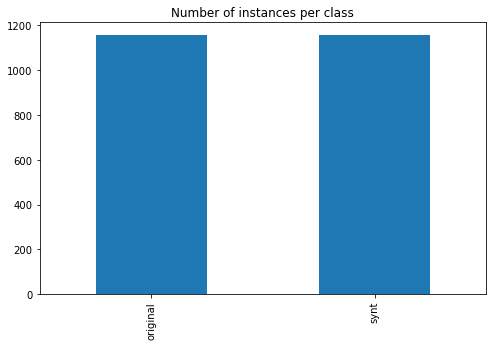

In [7]:
train.audio.value_counts().plot(kind='bar', title = u'Number of instances per class', figsize=(8,5))

# Using KFold as cross validation

In [8]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, random_state=7)

# Split data

In [9]:
from sklearn.model_selection import train_test_split

per_split = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = per_split, random_state = 11)

# Import confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

nomes_linhas = ['original', 'synt']
nomes_cols = ['original', 'synt']

# Using Logistic Regression as classifier

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

lrc = LogisticRegression()

parameters_lrc = {'penalty': ['l1', 'l2'],
                'max_iter': [10, 20, 30, 50, 100, 200, 500],
                'n_jobs': [-1]
               }

acc_score = make_scorer(accuracy_score)

grid_lrc = GridSearchCV(lrc, parameters_lrc, scoring=acc_score)
grid_lrc = grid_lrc.fit(X, y)

lrc = grid_lrc.best_estimator_

lrc.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=30, multi_class='ovr', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Cross validation, folds: 10

In [12]:
results_lrc = cross_val_score(lrc, X, y, cv=kfold)
print (results_lrc.mean())

0.961955142559


# Training set

In [13]:
predicts_lrc = lrc.predict(X)
print (accuracy_score(y, predicts_lrc))

0.970588235294


# Confusion matrix of training set

In [14]:
cm_ts_lrc = pd.DataFrame(confusion_matrix(y, predicts_lrc, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_lrc

,original,synt
original,1120,36
synt,32,1124


# Percentage split

In [15]:
lrc.fit(X_train, y_train)
predicts_lrc_split = lrc.predict(X_test)
print (accuracy_score(y_test, predicts_lrc_split))

0.984881209503


# Confusion matrix of split

In [16]:
cm_ts_lrc_s = pd.DataFrame(confusion_matrix(y_test, predicts_lrc_split, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_lrc_s

,original,synt
original,241,5
synt,2,215


In [17]:
rs_lrc = []
rs_lrc.append(results_lrc.mean())
rs_lrc.append(accuracy_score(y, predicts_lrc))
rs_lrc.append(accuracy_score(y_test, predicts_lrc_split))

# Using Gradient Boosting as classifier

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters_gbc = {'learning_rate': [0.01, 0.1, 0.05],
                  'n_estimators': [100, 250, 500],
                  'max_depth': [3, 5, 10],
                  'max_features': ['auto', 'log2']}

acc_score_gbc = make_scorer(accuracy_score)

grid_gbc = GridSearchCV(gbc, parameters_gbc, scoring=acc_score_gbc)
grid_gbc = grid_gbc.fit(X, y)

gbc = grid_gbc.best_estimator_

gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=500, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

# Cross validation

In [19]:
results_gbc = cross_val_score(gbc, X, y, cv=kfold)
print (results_gbc.mean())

0.978832661591


# Training set

In [20]:
predicts_gbc = gbc.predict(X)
print (accuracy_score(y, predicts_gbc))

1.0


# Confusion matrix of training set

In [21]:
cm_ts_gbc = pd.DataFrame(confusion_matrix(y, predicts_gbc, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_gbc

,original,synt
original,1156,0
synt,0,1156


# Percentage split

In [22]:
gbc.fit(X_train, y_train)
predicts_gbc_split = gbc.predict(X_test)
print (accuracy_score(y_test, predicts_gbc_split))

0.980561555076


# Confusion matrix of split

In [23]:
cm_ts_gbc_s = pd.DataFrame(confusion_matrix(y_test, predicts_gbc_split, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_gbc_s

,original,synt
original,240,6
synt,3,214


In [24]:
rs_gbc = []
rs_gbc.append(results_gbc.mean())
rs_gbc.append(accuracy_score(y, predicts_gbc))
rs_gbc.append(accuracy_score(y_test, predicts_gbc_split))

# Using decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()

parameters_dtc = {'max_features': ['auto', 'log2'],
                'criterion': ['gini', 'entropy']
               }

acc_score_dtc = make_scorer(accuracy_score)

grid_dtc = GridSearchCV(clf_dtc, parameters_dtc, scoring=acc_score_dtc)
grid_dtc = grid_dtc.fit(X, y)

clf_dtc = grid_dtc.best_estimator_

clf_dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Cross validation, folds: 10

In [26]:
results_dtc = cross_val_score(clf_dtc, X, y, cv=kfold)
print (results_dtc.mean())

0.957204433498


# Percentage split

In [27]:
clf_dtc.fit(X_train, y_train)
predicts_dtc_split = clf_dtc.predict(X_test)
print (accuracy_score(y_test, predicts_dtc_split))

0.965442764579


# Confusion matrix of split

In [28]:
cm_ts_dtc_s = pd.DataFrame(confusion_matrix(y_test, predicts_dtc_split, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_dtc_s

,original,synt
original,238,8
synt,8,209


# Using Multilayer Perceptron as classifier

In [29]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

clf_mlp = MLPClassifier()

parameters_mlp = {'hidden_layer_sizes': [(5,), (5,2), (8,), (10,), (10,2), (20,2), (20,)], 
              'max_iter': [500, 1000, 1500],
              'learning_rate_init': [0.01, 0.3, 0.05, 0.10, 0.001, 0.005],
              'momentum': [0.2, 0.5, 0.7, 0.9]
             }

acc_score_mlp = make_scorer(accuracy_score)

grid_mlp = GridSearchCV(clf_mlp, parameters_mlp, scoring=acc_score_mlp)
grid_mlp = grid_mlp.fit(X, y)

clf_mlp = grid_mlp.best_estimator_

clf_mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20,), learning_rate='constant',
       learning_rate_init=0.3, max_iter=1000, momentum=0.2,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

# Cross validation, folds: 10

In [30]:
results_mlp = cross_val_score(clf_mlp, X, y, cv=kfold)
print (results_mlp.mean())

0.406463651291


# Training set

In [31]:
predicts_mlp = clf_mlp.predict(X)
print (accuracy_score(y, predicts_mlp))

0.56401384083


# Confusion matrix of training set

In [32]:
cm_ts_mlp = pd.DataFrame(confusion_matrix(y, predicts_mlp, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_mlp

,original,synt
original,447,709
synt,299,857


# Percentage split

In [33]:
clf_mlp.fit(X_train, y_train)
predicts_mlp_split = clf_mlp.predict(X_test)
print (accuracy_score(y_test, predicts_mlp_split))

0.455723542117


# Confusion matrix of split

In [34]:
cm_ts_mlp_s = pd.DataFrame(confusion_matrix(y_test, predicts_mlp_split, labels=['original', 'synt']), index=nomes_linhas, columns=nomes_cols)
cm_ts_mlp_s

,original,synt
original,200,46
synt,206,11


In [35]:
rs_mlp = []
rs_mlp.append(results_mlp.mean())
rs_mlp.append(accuracy_score(y, predicts_mlp))
rs_mlp.append(accuracy_score(y_test, predicts_mlp_split))

# Using Support Vector Machine as classifier 

In [36]:
from sklearn import svm

from sklearn.metrics import accuracy_score, make_scorer

svm_clf = svm.LinearSVC()

# parameters_svm = {'kernel': ['linear', 'rbf']}

# acc_scorer_svm = make_scorer(accuracy_score)

# grid_svm = GridSearchCV(svm_clf, parameters_svm, scoring=acc_scorer_svm)
# grid_svm = grid_svm.fit(X, y)

# svm_clf = grid_svm.best_estimator_

svm_clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# Cross validation, folds: 10

In [37]:
results_svm = cross_val_score(svm_clf, X, y, cv=kfold)
print (results_svm.mean())

0.586307657859


In [41]:
rs_svm = []
rs_svm.append(results_svm.mean())
rs_svm.append(-1)
rs_svm.append(-1)

# Features importances

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[ 0.05875862  0.23685209  0.34626272  0.04638603  0.02203141  0.04460186
  0.12243624  0.09079107  0.03187996]


# Accuracy table

In [42]:
cmns = ['cross_validation', 'training_set', 'percentage_split']
idx = ['logistic_regression', 'gradient_boosting', 'multilayer_perceptron', 'support vector machine']
t = pd.DataFrame([rs_lrc, rs_gbc, rs_mlp, rs_svm], index=idx, columns=cmns)

t

,cross_validation,training_set,percentage_split
logistic_regression,0.961955,0.970588,0.984881
gradient_boosting,0.978833,1.000000,0.980562
multilayer_perceptron,0.406464,0.564014,0.455724
support vector machine,0.586308,-1.000000,-1.000000


*-1 : não foi utilizado